In [4]:
import sys

sys.path.append("../src/spm")
import electrode_dynamics
import importlib

importlib.reload(electrode_dynamics)
from electrode_dynamics import *

0.9955967884577424
0.9906737773415104
0.9952386400390468
0.9912435995754078
0.9949427588190453
0.9917182779773882
0.9947070470035956
0.9921118705487941
0.9945234293679671
0.9924382055148057
0.9943829985203148
0.9927093583683714
0.9942776467376835
0.9929354400278718
0.994200462332279
0.9931247715945817
0.9941457187266162
0.9932841466610162
0.9941087405602448
0.9934190887443137
0.9940857443294204
0.9935340782434926
0.994073686715132
0.9936327446591494
0.9940701309494041
0.9937180263855498
0.9940731332204774
0.9937923021535986
0.9940811480225421
0.9938574984033572
0.9940929502812705
0.9939151765528432
0.9941075718354833
0.9939666036610952
0.9941242499515925
0.9940128094866495
0.9941423857846616
0.994054632469538
0.9941615109818744
0.9940927567378846
0.9941812609046126
0.9941277418674158
0.9942013532026627
0.9941600468044653
0.9942215706997616
0.9941900490969409
0.9942417477420636
0.9942180603577437
0.9942617593220053
0.9942443387050626
0.9942815124228265
0.9942690987776241
0.9943009391375

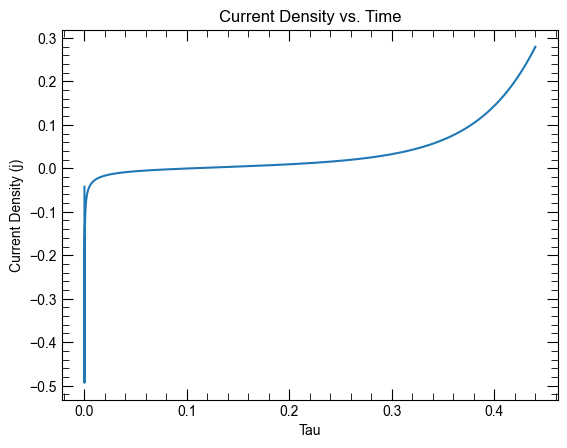

In [6]:
params = {
    "beta": 0.5,
    "c1": 1.0,
    "r0": 5e-4,
    "c0": 23.7,
    "ct": 23.7,
    "k": 0.00019,
    "nu": 0.01,
    "a": 1.36,
    "U0": 3.5102,
    "F_RT": 12,
    "D": 2.2e-9,
    "Nx": 100,
    "Ntau": 100000,
    "t_max": 50,
}
y, js, tau = simulate_electrochemical_system(**params)
plot_results(tau, js)

In [540]:
import numpy as np
import matplotlib.pyplot as plt
import spm.utils
import importlib

importlib.reload(spm.utils)
from spm.utils import *

beta = 0.5
c1 = 1.0
r0 = 5 * 1e-4
c0 = 23.7
ct = 23.7
k = 0.00019
nu = 0.01
# nu = 0.0
a = 1.36
U0 = 3.5102
# F_RT = 38.92
F_RT = 12
D = 2.2 * 1e-9
Nx = 100
Ntau = 100000
x = np.linspace(0, 1, Nx)
t = np.linspace(0, 50, Ntau)
tau = t * D / r0**2
# tau = t
dx = x[1] - x[0]
dtau = tau[1] - tau[0]
alpha0 = dtau / dx**2
alpha1 = 2 * dtau / dx
Uapp = U0 + nu * t
# 三角波を生成
# Uapp = U0 - 2 * nu * (np.abs(tau - taumax / 2)) + taumax
y = np.ones(Nx) * 0.99
js = np.zeros(Ntau)
for itau in range(Ntau):
    yn = np.zeros(Nx)
    for i in range(1, Nx - 1):
        yn[i] = (
            y[i]
            + alpha0 * (y[i + 1] - 2 * y[i] + y[i - 1])
            + alpha1 / x[i] * (y[i + 1] - y[i])
        )
    yn[0] = yn[1]
    yn[-1] = yn[-2] - dx * a * np.sqrt((1.0 - y[-1]) * (y[-1])) * 2 * np.sinh(
        0.5 * F_RT * (Uapp[itau] - ocv_LMO(y[-1]))
    )
    y = yn
    js[itau] = (
        a
        * np.sqrt((1.0 - y[-1]) * (y[-1]))
        * 2
        * np.sinh(0.5 * F_RT * (Uapp[itau] - ocv_LMO(y[-1])))
    )
    print(y[-1])

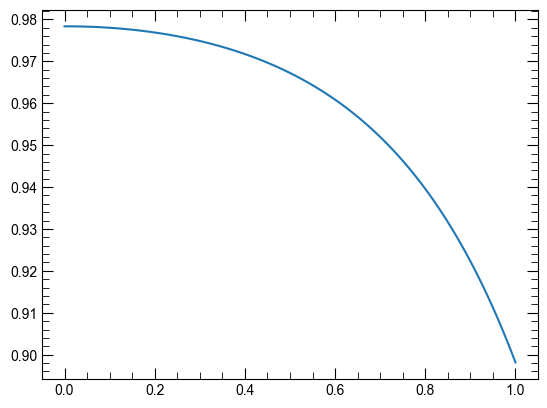

In [544]:
fig, ax = plt.subplots()
ax.plot(x, y)

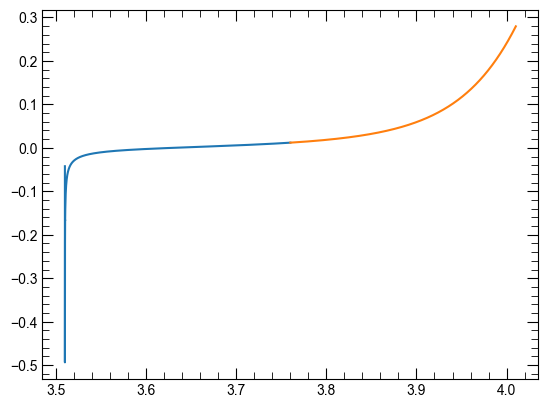

In [545]:
fig, ax = plt.subplots()
ax.plot(Uapp[: Ntau // 2], js[: Ntau // 2])
ax.plot(Uapp[Ntau // 2 :], js[Ntau // 2 :])

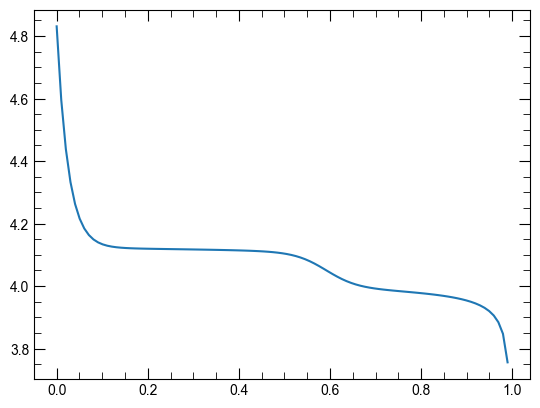

In [546]:
y = np.linspace(0, 1, 100)
ocv = ocv_LMO(y)
fig, ax = plt.subplots()
ax.plot(y, ocv)